Some functions:

In [4]:
options( warn = -1 )
library(gdata)

get.LOD.by.COR = function(n.pheno, pheno, gdata) {
  # Lynch and Walsh p. 454
  return( (-n.pheno*log(1-cor(pheno, gdata, use='pairwise.complete.obs')^2))/(2*log(10)) )  }


get.LOD.by.COR.rank = function(n.pheno, pheno, gdata) {
  # Lynch and Walsh p. 454
  return( (-n.pheno*log(1-cor(pheno, gdata, use='pairwise.complete.obs', method='spearman')^2,))/(2*log(10)) )  }

In [3]:
load(file="../genotype/1000BYxRM_with_names.RData")

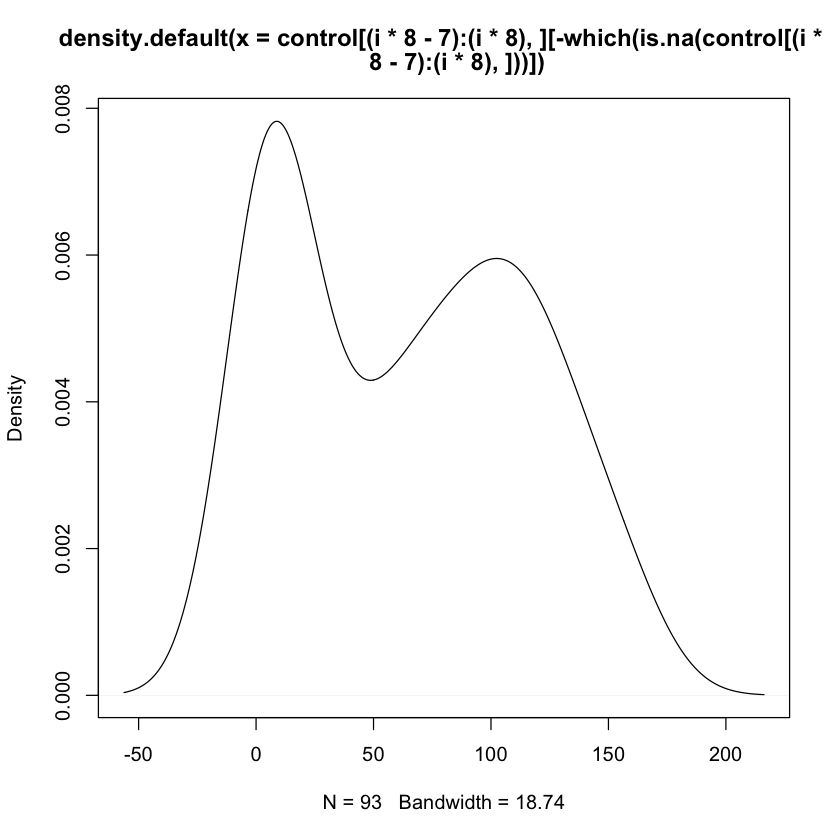

[1] 1
5% 
 2 


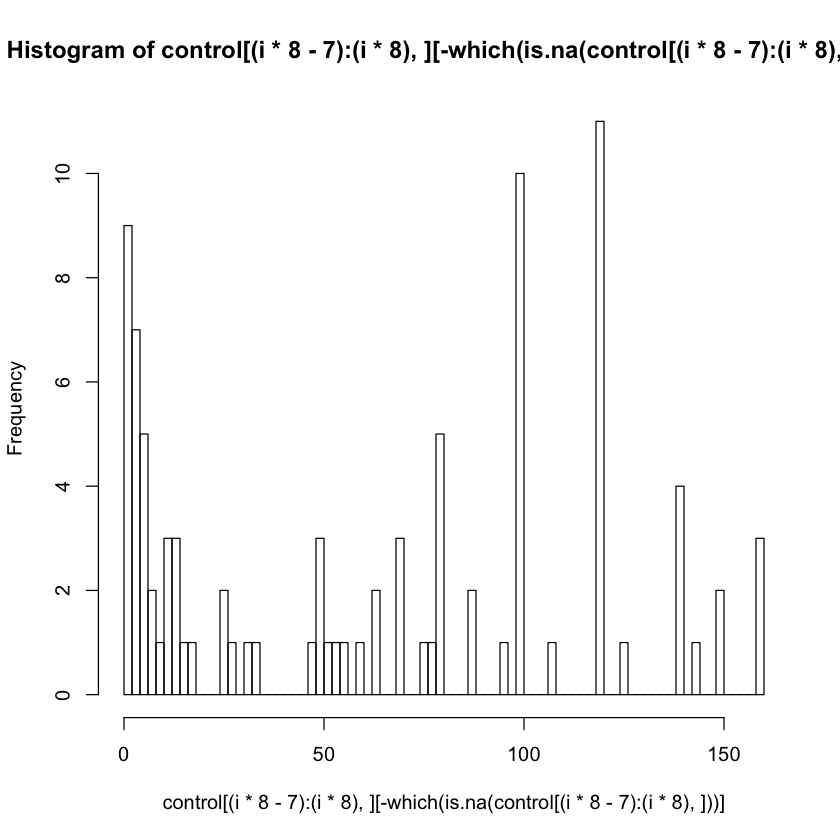

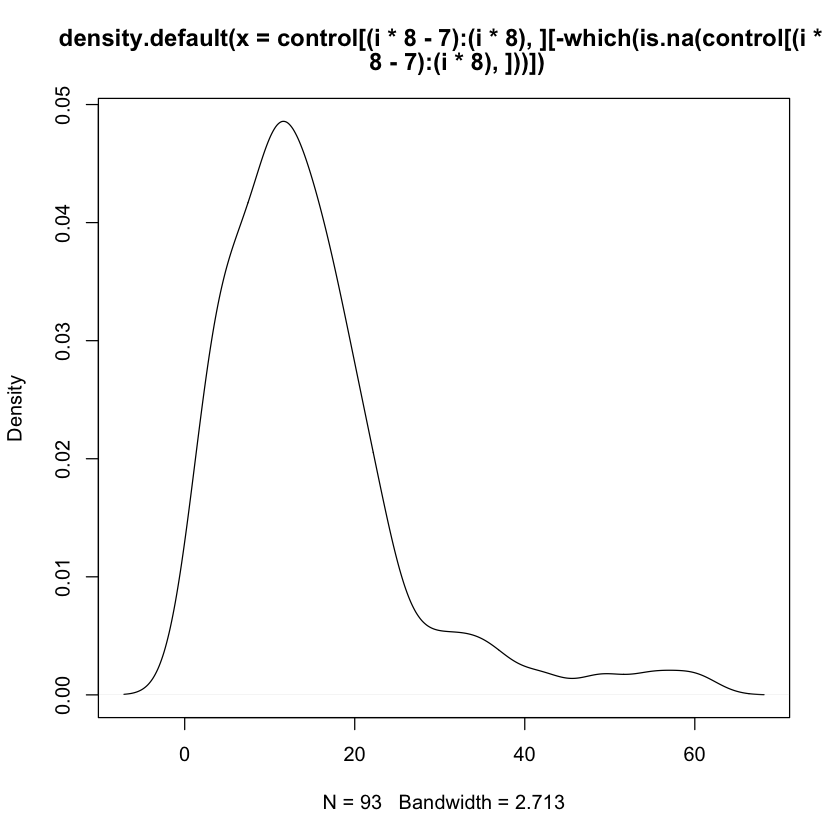

[1] 2
 5% 
2.6 


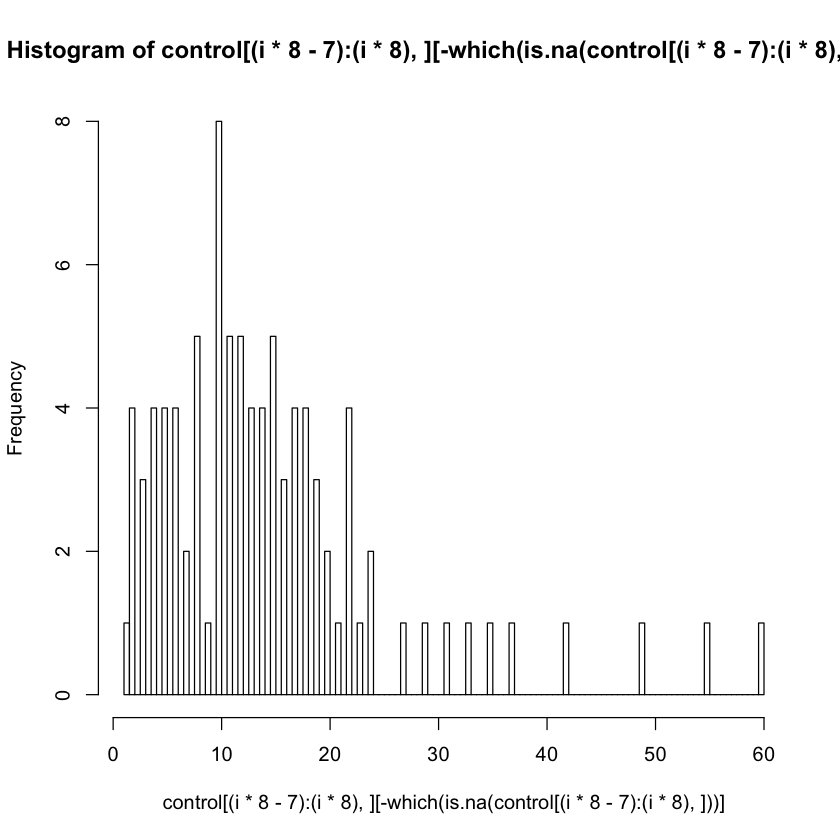

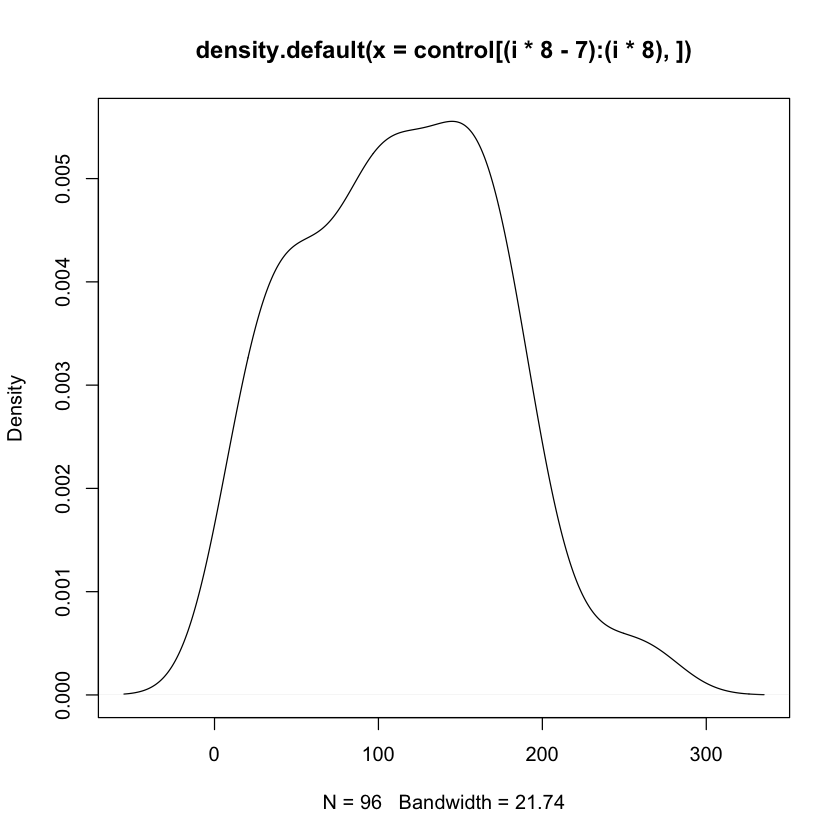

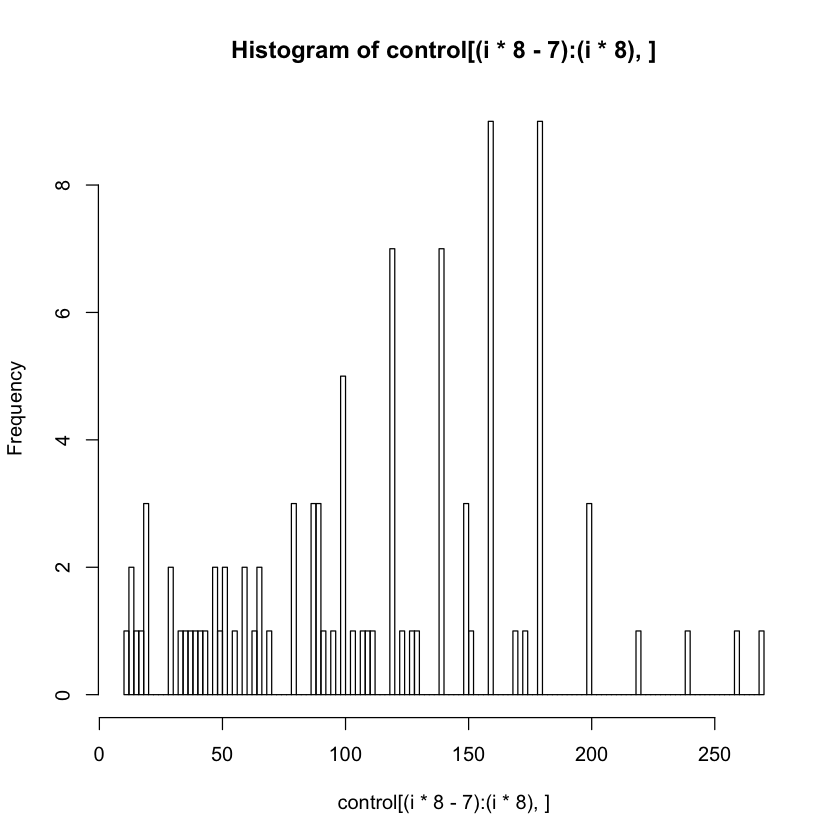

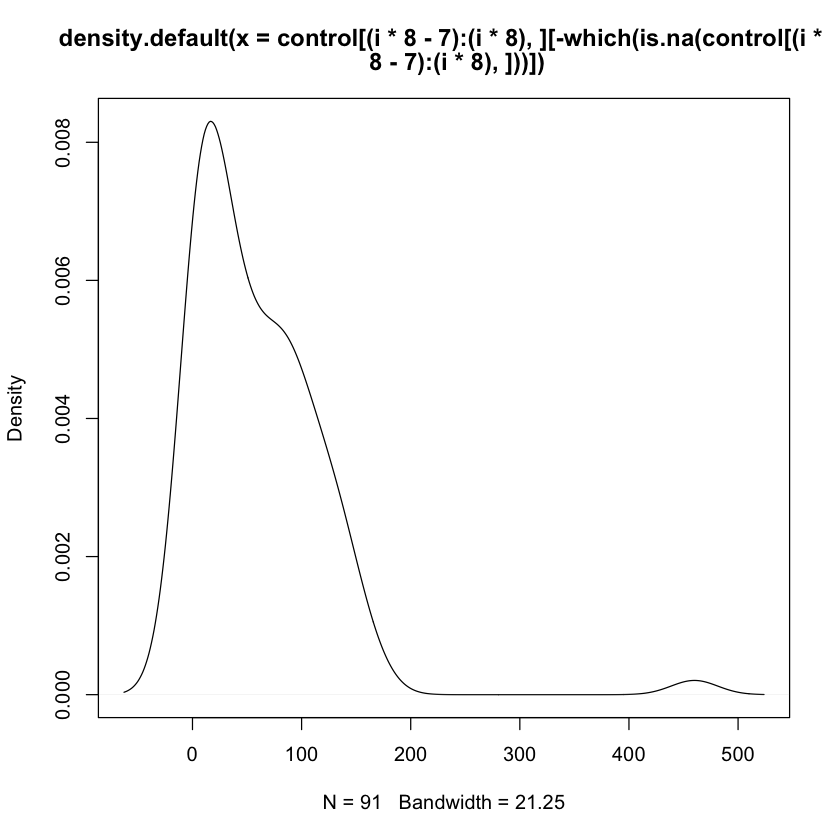

[1] 4
 5% 
1.5 


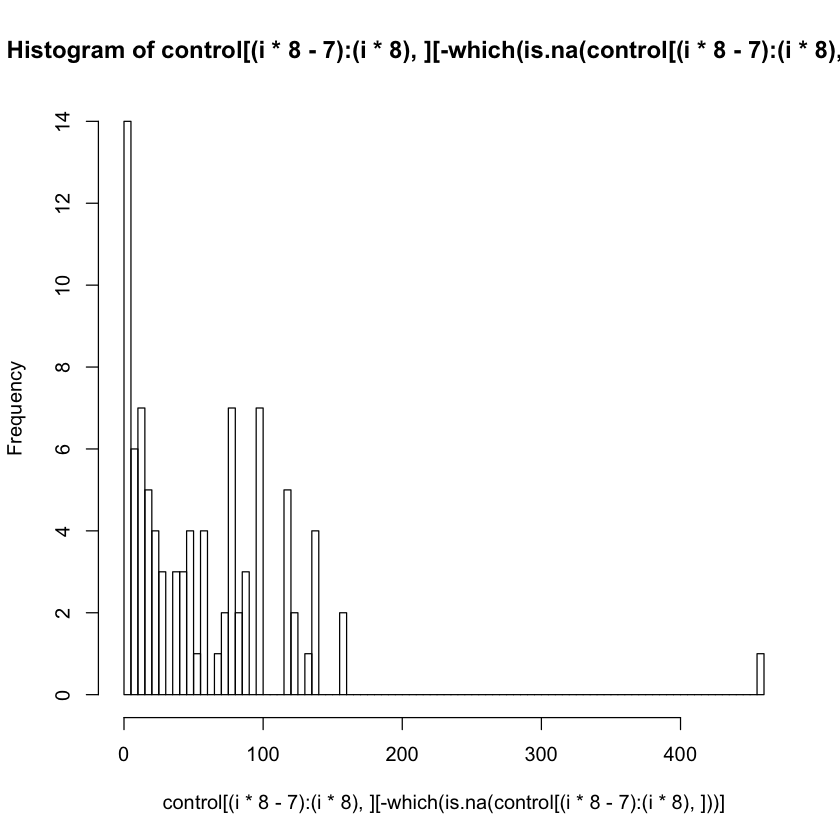

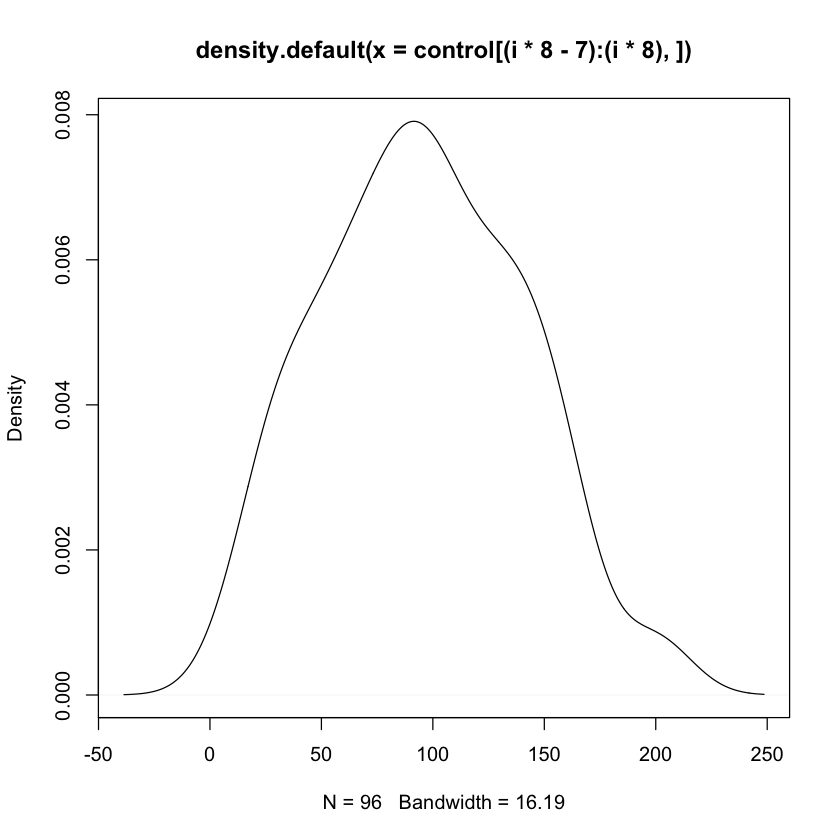

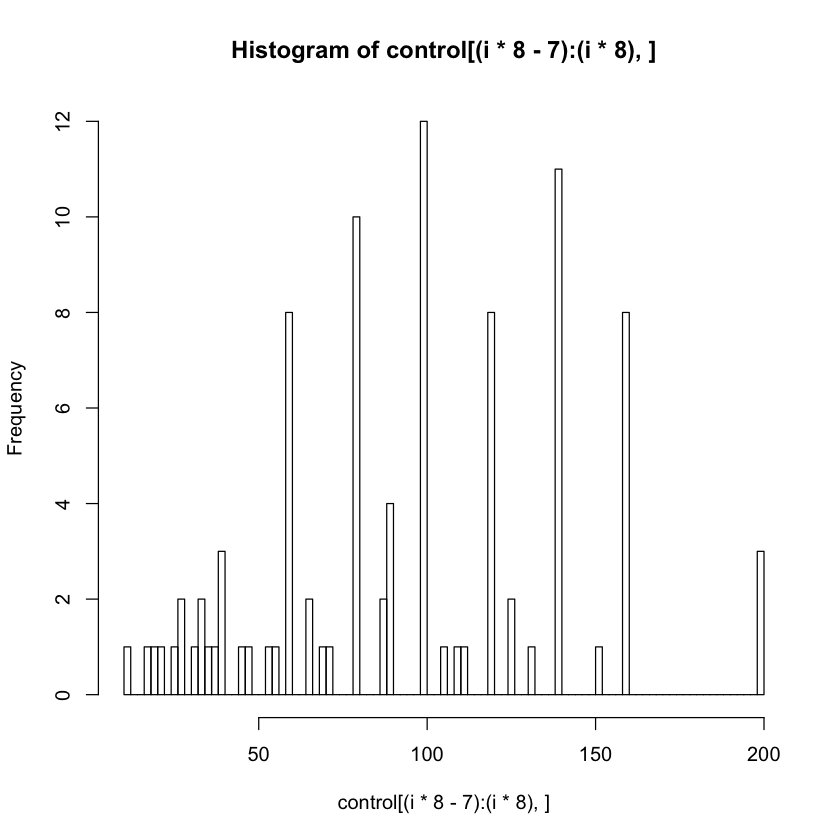

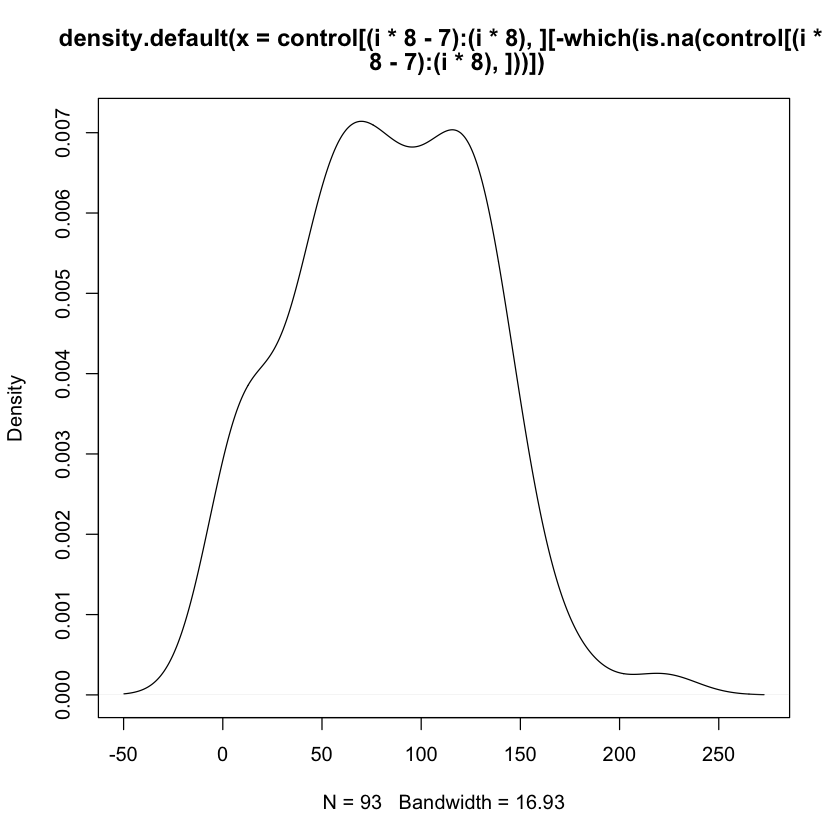

[1] 6
5% 
 5 


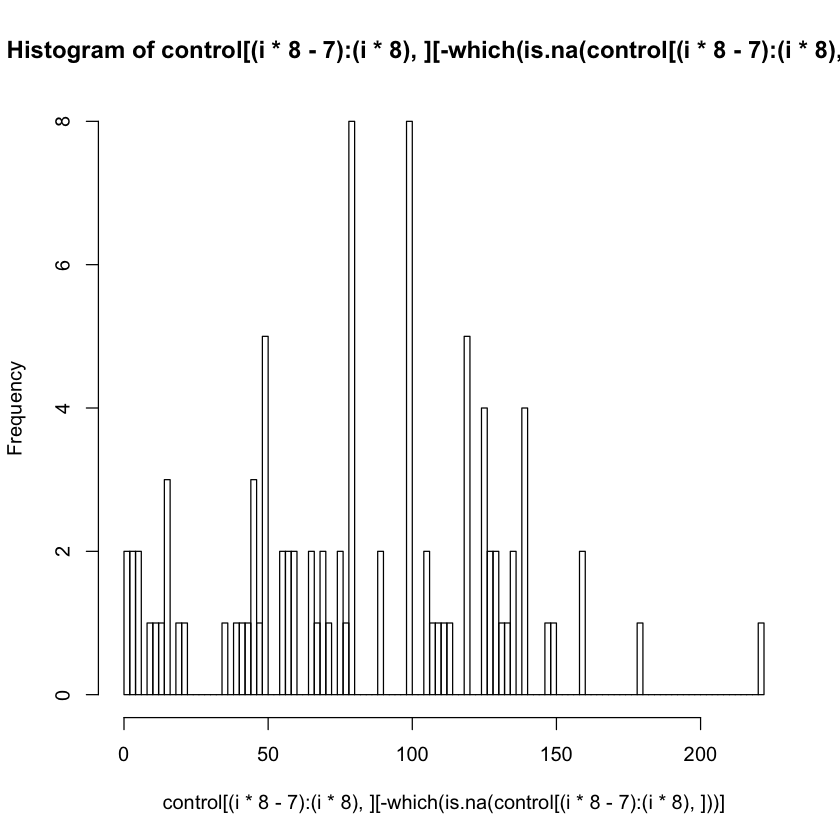

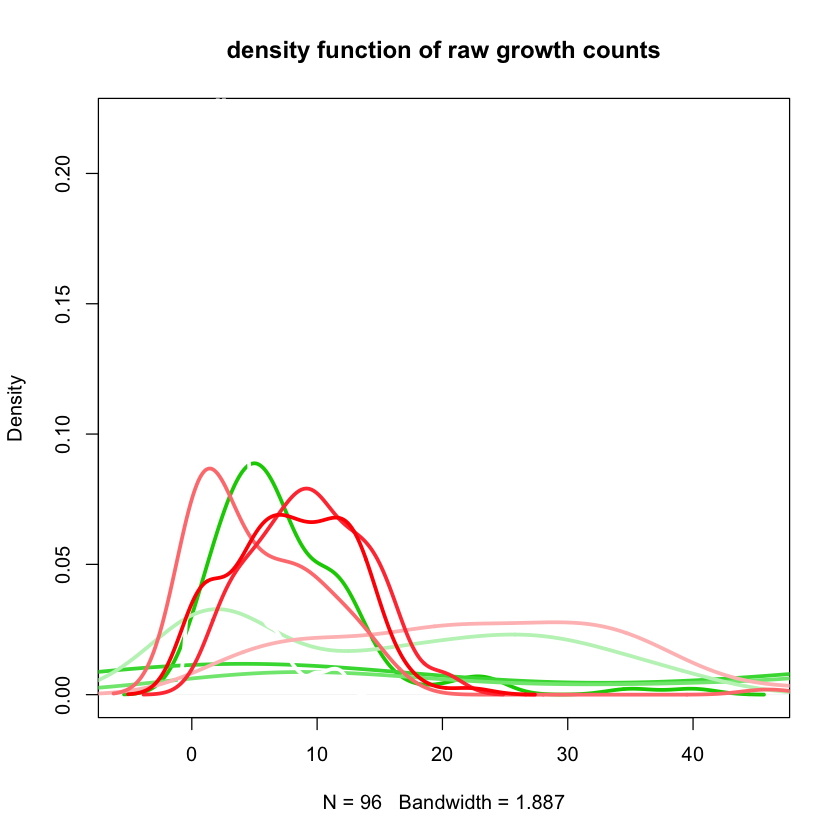

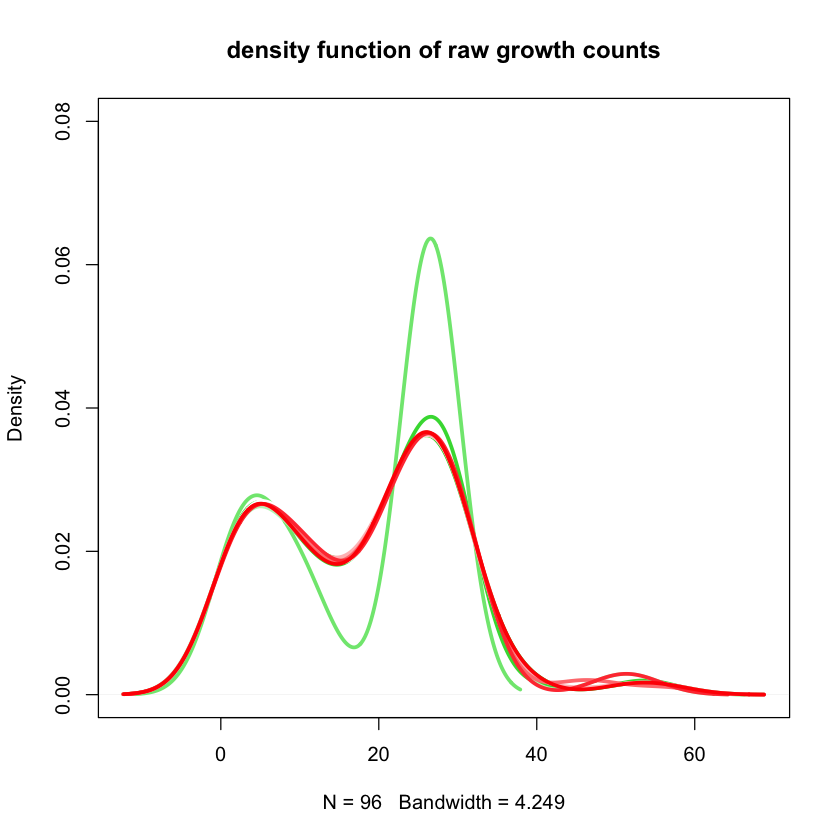

In [17]:
options( warn = -1 )
control=as.matrix(read.table('../phenotype/A6-11control.txt',header=FALSE,sep="\t"))

#######explore the density plots of the 6 plates
for (i in 1:6){
  if(anyNA(control[(i*8-7):(i*8),])==TRUE){
    plot(density(control[(i*8-7):(i*8),][-which(is.na(control[(i*8-7):(i*8),]))]))
    hist(control[(i*8-7):(i*8),][-which(is.na(control[(i*8-7):(i*8),]))],breaks=100)
    print(i)
    #use the 5% quantile value replace the NA in the plates
    print(quantile(control[(i*8-7):(i*8),][-which(is.na(control[(i*8-7):(i*8),]))],0.05))
  }
  else{
    plot(density(control[(i*8-7):(i*8),]))
    hist(control[(i*8-7):(i*8),],breaks=100)  
  }
}

######quantile normalize the data
#http://jtleek.com/genstats/inst/doc/02_05_normalization.html
library(devtools)
library(Biobase)
library(preprocessCore)

#A6-11
control2=as.matrix(read.table('../phenotype/A6-11control_normed.txt',header=FALSE,sep="\t"))
control.new=matrix(NA,nrow=96,ncol=6)
for (p in 1:6){
  control.new[,p]=as.vector(t(control2[(p*8-7):(p*8),])) ##t()helps to convert the matrix and get a as.vector by row
}

#A2-4
control1=as.matrix(read.table('../phenotype/A2-4control_normed.txt',header=FALSE,sep="\t"))

#combine A2-4 & A6-11
control.combine=cbind(control1,control.new)
#save(control.combine,file="~/Dropbox/MutationRate/20160606control/control.combine.Rdata")

colramp = colorRampPalette(c(3,"white",2))(9)
plot(density(control.combine[,1]),col=colramp[1],lwd=3,ylim=c(0,.22),main = "density function of raw growth counts")
for(i in 2:9){lines(density(control.combine[,i]),lwd=3,col=colramp[i])}

normcon=normalize.quantiles(control.combine)
plot(density(normcon[,1]),col=colramp[1],lwd=3,ylim=c(0,.08),main = "density function of raw growth counts")
for(i in 2:9){lines(density(normcon[,i]),lwd=3,col=colramp[i])}

normcon=as.vector(normcon)
control.combine=as.vector(control.combine)


In [11]:
xl=list()
xl[[1]]=read.table('~/Dropbox/MutationRate/20160606control/m2-4.6-11.txt',header=FALSE,sep="\t")

In [12]:
#extract segregant names and reformat 
pheno.seg.names=as.character(xl[[1]][,1])
pheno.seg.names.s=do.call('rbind', strsplit(pheno.seg.names, '_'))
pheno.seg.names.s[,2]=sprintf('%02d', as.numeric(pheno.seg.names.s[,2]))
pheno.seg.names=apply(pheno.seg.names.s, 1, paste, collapse='_')

pheno.data=data.frame(m=xl[[1]][,2])
rownames(pheno.data)=pheno.seg.names
pheno.data=t(pheno.data)

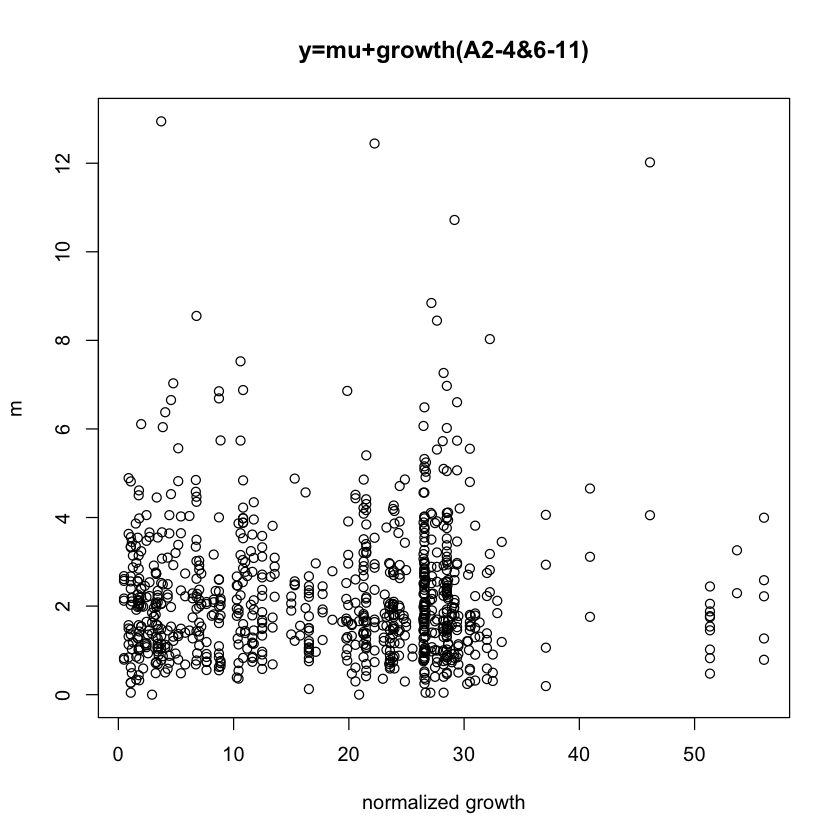


Call:
lm(formula = pheno.data[1, ] ~ plate)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0397 -0.8737 -0.2821  0.5328 10.1211 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.32393    0.15205  15.284  < 2e-16 ***
plateplate11 -0.28999    0.21222  -1.366 0.172146    
plateplate2  -1.21644    0.21222  -5.732 1.38e-08 ***
plateplate3  -0.01451    0.21276  -0.068 0.945651    
plateplate4   0.23778    0.21222   1.120 0.262836    
plateplate6  -0.06393    0.21222  -0.301 0.763312    
plateplate7  -0.47308    0.21388  -2.212 0.027239 *  
plateplate8   0.29655    0.21331   1.390 0.164834    
plateplate9   0.71572    0.21222   3.373 0.000778 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.45 on 844 degrees of freedom
  (11 observations deleted due to missingness)
Multiple R-squared:  0.1135,	Adjusted R-squared:  0.1051 
F-statistic: 13.51 on 8 and 844 DF,  p-value: < 2.2e-16


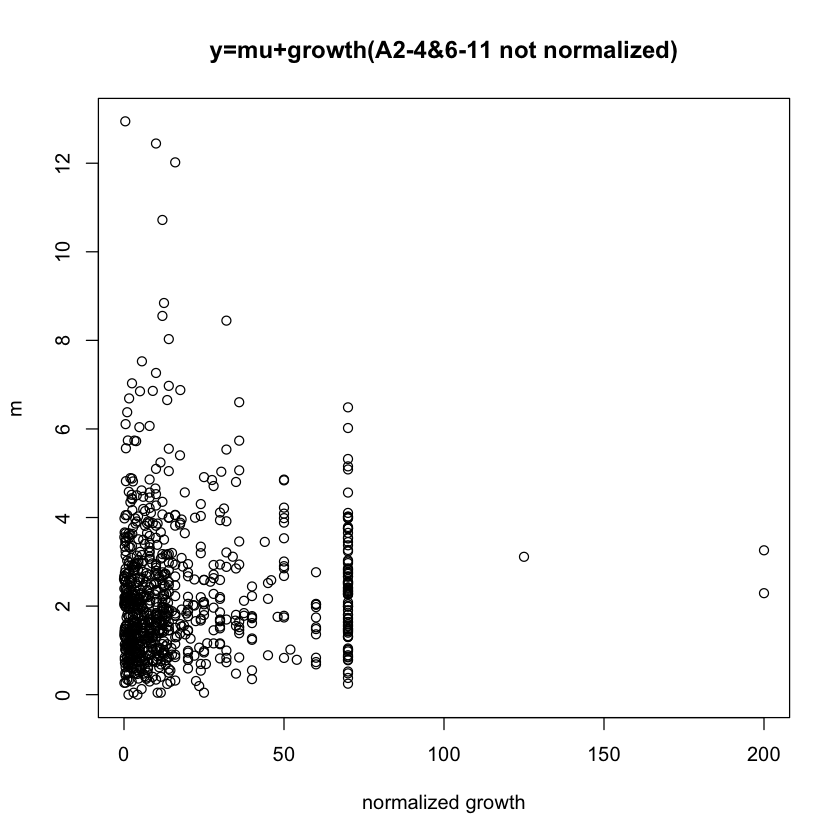


Call:
lm(formula = control.combine ~ plate)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.286  -4.904  -0.295   6.381 159.242 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.551      1.741   5.486 5.41e-08 ***
plateplate11   -1.479      2.462  -0.601   0.5481    
plateplate2    -1.689      2.462  -0.686   0.4929    
plateplate3    31.207      2.462  12.675  < 2e-16 ***
plateplate4    42.235      2.462  17.155  < 2e-16 ***
plateplate6     5.978      2.462   2.428   0.0154 *  
plateplate7    -6.656      2.462  -2.703   0.0070 ** 
plateplate8    12.953      2.462   5.261 1.81e-07 ***
plateplate9    -3.909      2.462  -1.588   0.1127    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.06 on 855 degrees of freedom
Multiple R-squared:  0.4744,	Adjusted R-squared:  0.4695 
F-statistic: 96.46 on 8 and 855 DF,  p-value: < 2.2e-16


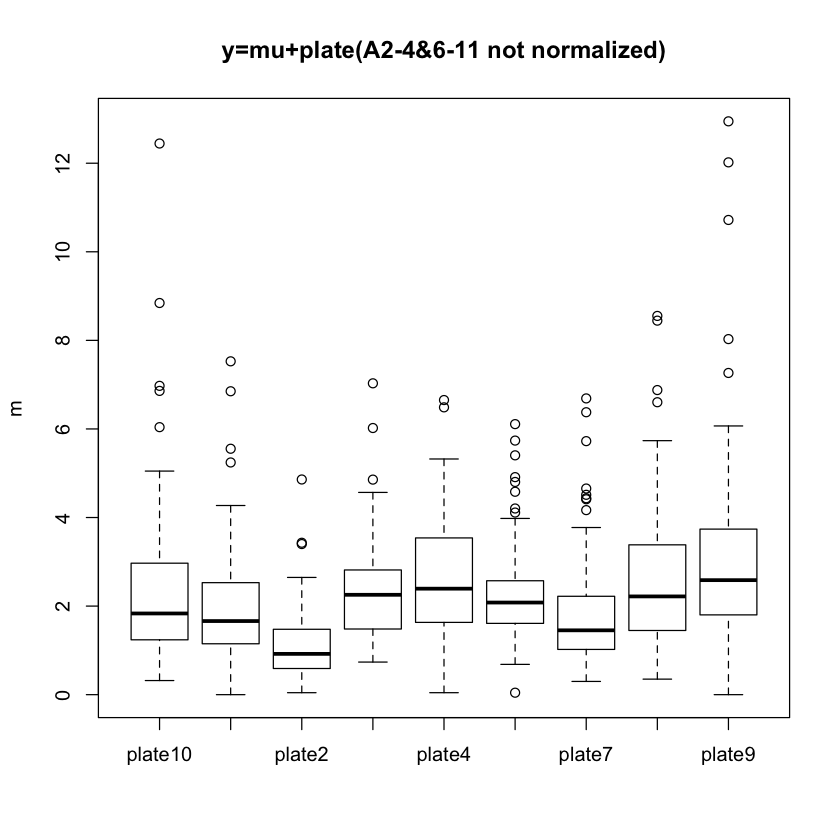

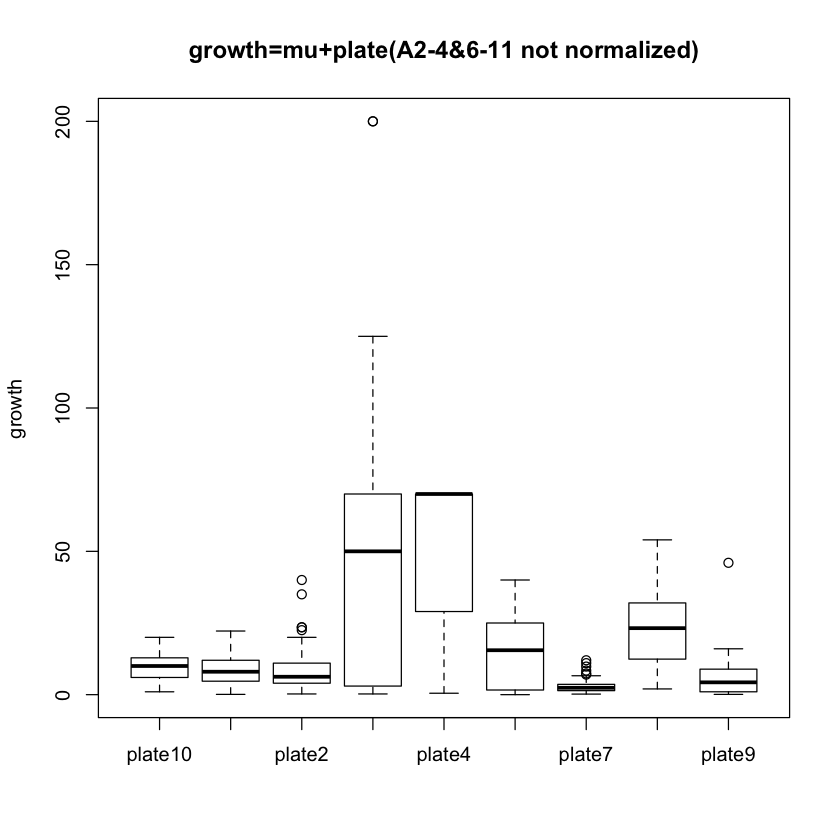

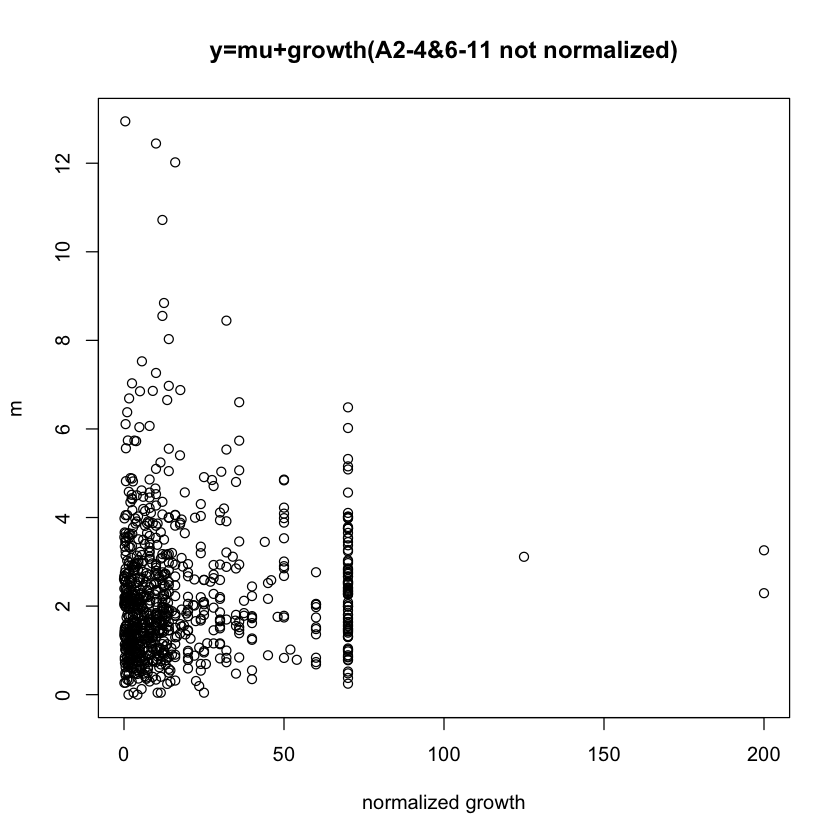

In [13]:
######linear regression with the normalized growth data
growtheffect=lm(pheno.data[1,]~normcon)
plot(pheno.data[1,]~normcon,xlab="normalized growth",ylab="m",main="y=mu+growth(A2-4&6-11)")

######linear regression with the ##unnormalized## growth data
growtheffect.nonormalize=lm(pheno.data[1,]~control.combine)
plot(pheno.data[1,]~control.combine,xlab="normalized growth",ylab="m",main="y=mu+growth(A2-4&6-11 not normalized)")

######take plate as a factor in the linear regression
plate=c("plate2","plate3","plate4","plate6","plate7","plate8","plate9","plate10","plate11")
plate=rep(plate,each=96)

######lm of m and plate
m.plate=lm(pheno.data[1,]~plate)
summary(m.plate)
boxplot(pheno.data[1,]~plate,ylab="m",main="y=mu+plate(A2-4&6-11 not normalized)")

######lm of growth and plate
growth.plate=lm(control.combine~plate)
summary(growth.plate)
boxplot(control.combine~plate,ylab="growth",main="growth=mu+plate(A2-4&6-11 not normalized)")

######linear regression with the ##unnormalized## growth data + plate effect
m.growth_plate=lm(pheno.data[1,]~0+control.combine + plate)
plot(pheno.data[1,]~control.combine,xlab="normalized growth",ylab="m",main="y=mu+growth(A2-4&6-11 not normalized)")

######get the residuals of the m.growth_plate
residu=residuals(m.growth_plate)
residu=t(as.matrix(residu))
#pheno.data has 864 numbers while residu only has 853, because of the NA in m
thename=names(pheno.data[1,which(!is.na(pheno.data))])
colnames(residu)=thename

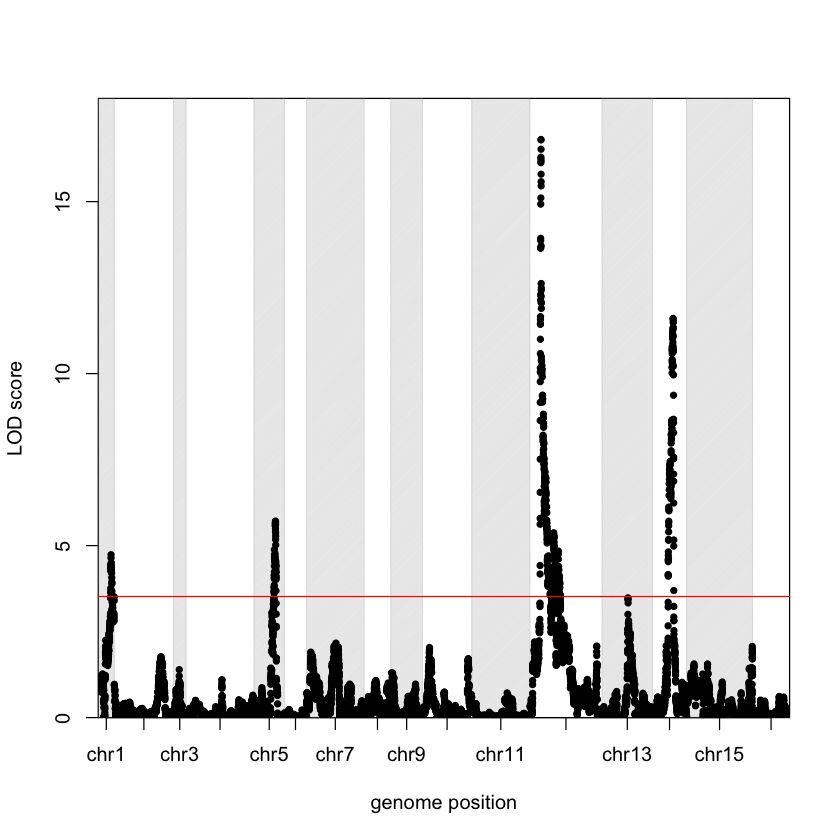

In [14]:
######did the QTL mapping with the residuals
######preparation
library(gdata)

get.LOD.by.COR = function(n.pheno, pheno, gdata) {
  # Lynch and Walsh p. 454
  return( (-n.pheno*log(1-cor(pheno, gdata, use='pairwise.complete.obs')^2))/(2*log(10)) )  }


get.LOD.by.COR.rank = function(n.pheno, pheno, gdata) {
  # Lynch and Walsh p. 454
  return( (-n.pheno*log(1-cor(pheno, gdata, use='pairwise.complete.obs', method='spearman')^2,))/(2*log(10)) )  }


base.dir='~/Dropbox/MutationRate/20160117_1000segregant/'
#unique chromosomes in order
unique.chrs=c(paste0('chr', as.roman(1:16)), 'chrMito')

######loading genome info
#genotype data -1 =BY, +1 =RM
load(paste0(base.dir, '1000BYxRM_with_names.RData'))

######match genome with pheno (residuals here)
#pheno_input_matrix=pheno.data
#geno_matrix=BYxRM_orig

match_pheno_and_geno=function(pheno_input_matrix, geno_matrix) {
  BYxRM_strain_name=do.call('rbind',strsplit(rownames(geno_matrix), ':'))[,1]
  sname=(do.call('rbind', strsplit(colnames(pheno_input_matrix), '-'))[,1])
  
  pheno_input_matrix=pheno_input_matrix[,-which(is.na(match(sname,BYxRM_strain_name)))]
  sname=(do.call('rbind', strsplit(names(pheno_input_matrix), '-'))[,1])
  gdata=geno_matrix[match(sname,BYxRM_strain_name),]
  return(list(pheno=pheno_input_matrix, gdata=gdata))
}

pg=match_pheno_and_geno(residu, BYxRM_orig)

p=t(pg$pheno)
#p[,1][p[,1]>1000]=NA

#removes non-informative markers
g=pg$gdata[,-which(duplicated(pg$gdata, MARGIN=2))]
#n=apply(p, 2, function(x) sum(!is.na(x)))
pp=apply(p,2,as.numeric)
n=length(pp)

######QTL mapping
LODs=get.LOD.by.COR(n, pp,g)

##make the x axis as the genome postion
mr_ind=match(colnames(LODs), colnames(BYxRM_orig))

par(xaxs="i",yaxs="i")
plot(LODs[1,]~mr_ind,xlab='genome position',ylab='LOD score',xlim=c(0,28220),ylim=c(0,18),xaxt="n",pch=20,type="n")

#calculate the middle position of each chr (mean of starting and ending positions)
v0=c(0,647,3066,3577,6356,7594,8499,10846,11942,13229,15244,17614,20565,22622,24013,26707,28220)

#defines position of tick marks
v1=c()
for (k in 1:(length(v0)-1)){
  v1[k]=mean(c(v0[k],v0[k+1]))
}

#defines labels of tick marks
v2=paste0("chr",c(1:16))
axis(side=1,at=v1,labels=v2)

######add shade background to the figure
# set alpha = 80 so it's relatively transparent
color <- rgb(190, 190, 190, alpha=80, maxColorValue=255)

chrpos=c(-2,647,3066,3577,6356,7594,8499,10846,11942,13229,15244,17614,20565,22622,24013,26707)
for (p in c(1,3,5,7,9,11,13,15)){
  rect(chrpos[p],-2,chrpos[p+1],20,density=100,col=color)
}

points(LODs[1,]~mr_ind,pch=20)
abline(h=3.520,col="red")

In [ ]:
#permutation for LODs
permu=matrix(NA,nrow = 1000,ncol=2)
for (j in 1:1000){
  print(j)
  this_p = pp[sample(1:length(pp))]
  this_n=length(this_p)
  #this_n = apply(this_p, 2, function(x) sum(!is.na(x)))
  middle=get.LOD.by.COR(this_n, this_p, g)
  #middle=get.LOD.by.COR.rank(this_n, this_p, g)
  permu[j,]=apply(middle,1,max)
}

maxquan=apply(permu,2,quantile,0.95)